In [15]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import matplotlib.cm as cm
from matplotlib.patches import Patch
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
import basicfunc as bf
import matplotlib.colors as clrs
import seaborn as sns

importlib.reload(bf)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\advancedLAB\\basicfunc.py'>


Optimised parameters
--------------------------------------------------
Cutoff frequency (f_cut) = 5128.409 ± 80.382
Chi-squared = 0.0471
Reduced chi-squared = 0.0043


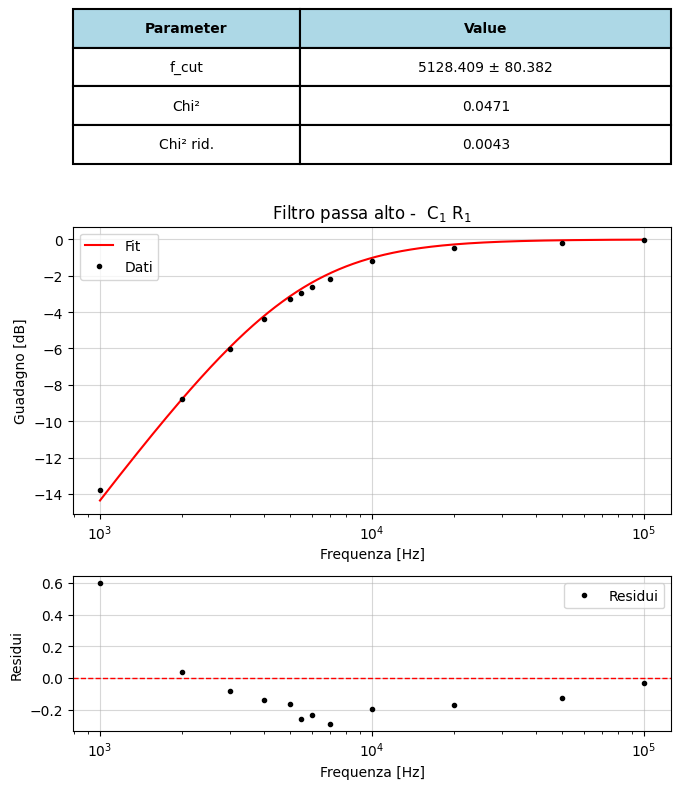

In [16]:
freq1, vin1, vout1 = np.loadtxt("r1c1.txt", unpack=True, skiprows=1)
altoR1C1 = bf.bode(freq1, vin1, vout1, tipo="high", titolo=r'Filtro passa alto -  C$_1$ R$_1$', plot=True, save=True)

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
A = 1.9781988597930735 ± 1.14684782227601
tau = 932.0520633906599 ± 1505.7232901531677
f0 = 0.00901793095945997 ± 1.0695749784240103
Chi-squared = 0.0008834851009368481
Reduced Chi-squared = 0.00017669702018736962


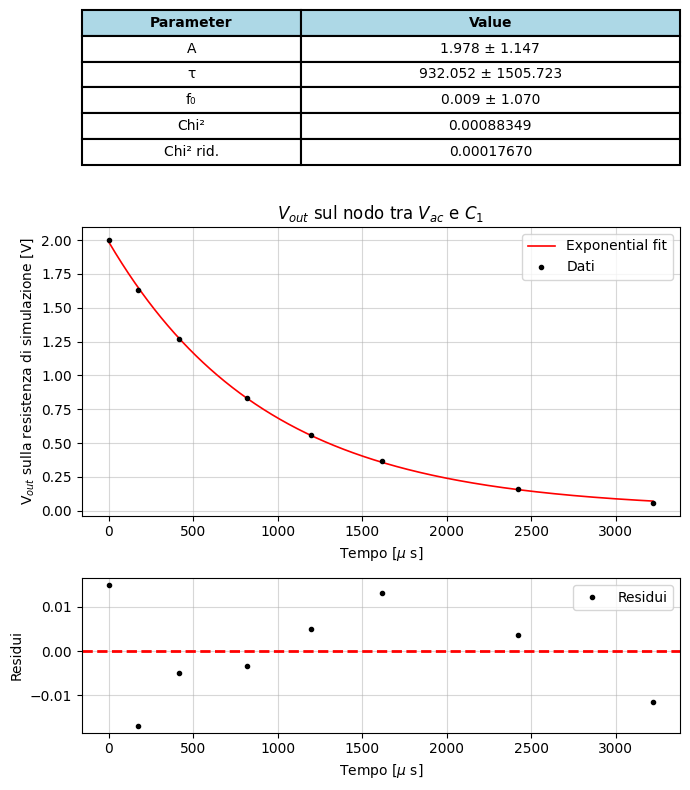

In [17]:
tempi = np.array([1, 176, 416, 816, 1200, 1620, 2420, 3220]) #microsecondi
vout_Rsimulaz = np.array([2.00, 1.63, 1.27, 0.83, 0.56, 0.37, 0.16, 0.06]) #volt

caduta_Rsimulazione = bf.exponential(tempi, vout_Rsimulaz, xlabel=r'Tempo [$\mu$ s]', ylabel=r'V$_{out}$ sulla resistenza di simulazione [V]', titolo=r'$V_{out}$ sul nodo tra $V_{ac}$ e $C_1$', plot=True, save=True)


Optimised parameters
--------------------------------------------------
Cutoff frequency (f_cut) = 5290.354 ± 71.176
Chi-squared = 0.0344
Reduced chi-squared = 0.0029


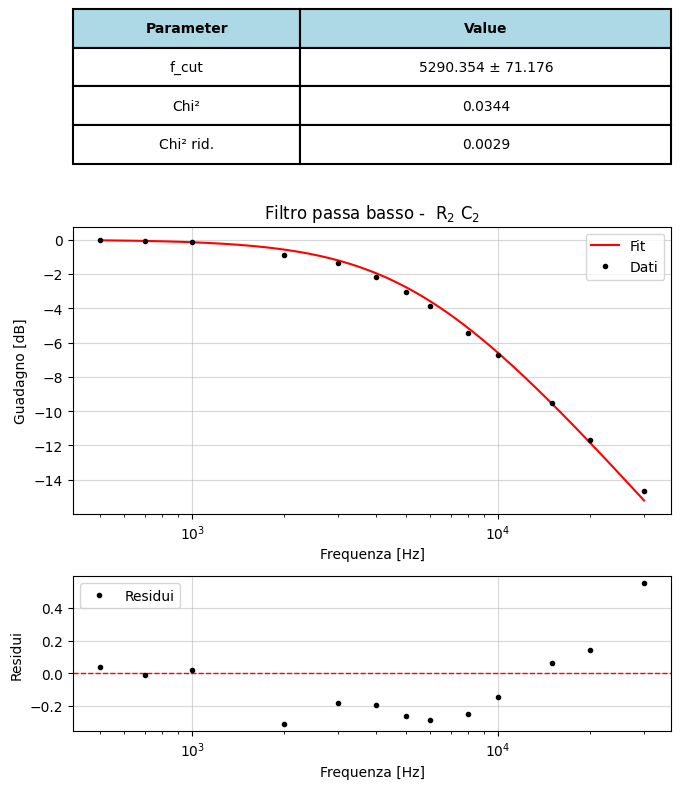

In [18]:
freq2, vin2, vout2 = np.loadtxt("r2c2.txt", unpack=True, skiprows=1)
bassoR2C2 = bf.bode(freq2, vin2, vout2, tipo="low", titolo=r'Filtro passa basso -  R$_2$ C$_2$', plot=True, save=True)

c:\Users\Utente\Desktop\advancedLAB\basicfunc.py:1251: RuntimeWarning: invalid value encountered in log10
  return 20 * np.log10(A * (f * gamma) / np.sqrt((f**2 - f0**2)**2 + (f * gamma)**2))



Optimised parameters
--------------------------------------------------
Resonant frequency (f₀) = 146.436 ± 0.213
Gamma (Γ) = 71.491 ± 0.549
Amplitude (A) = 0.808 ± 0.003
Chi-squared = 0.0158
Reduced chi-squared = 0.0007


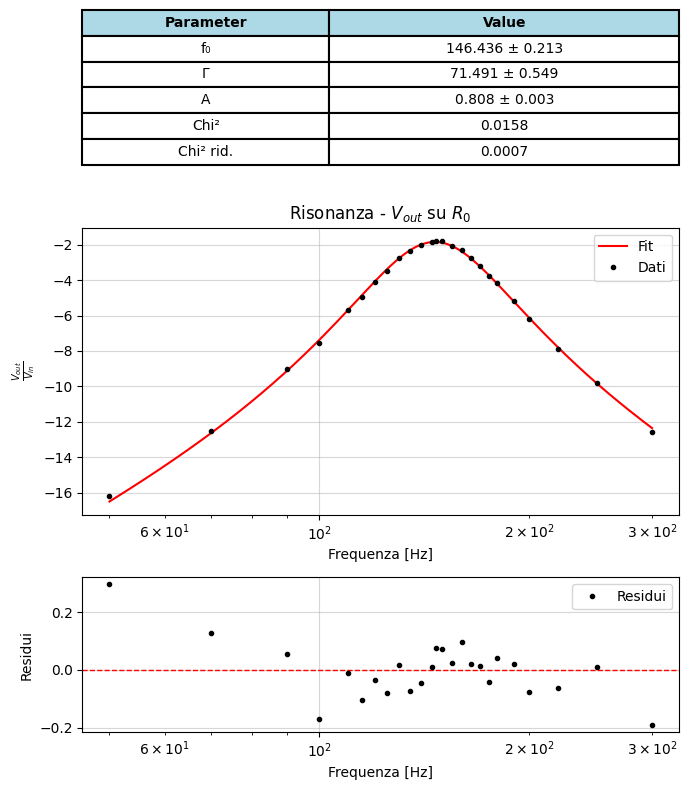

In [19]:
#misure del 30/04/2025 escludendo il dato a 10 kHz
frq = np.array([50, 70, 90, 100, 110, 115, 120, 125, 130, 135, 140, 145, 147, 150, 155, 160, 165, 170, 175, 180, 190, 200, 220, 250, 300])
input = np.array([2, 1.98, 1.880, 1.82, 1.74, 1.7, 1.64, 1.58, 1.54, 1.5, 1.48, 1.46, 1.46, 1.46, 1.48, 1.5, 1.54, 1.58, 1.62, 1.66, 1.7, 
                  1.78, 1.86, 1.92, 2])
output = np.array([0.310, 0.470, 0.664, 0.764, 0.904, 0.96, 1.02, 1.06, 1.12, 1.14, 1.17, 1.18, 1.19, 1.184, 1.168, 1.152, 1.12, 1.09,
                   1.05, 1.026, 0.936, 0.87, 0.752, 0.62, 0.472])
out_in = np.array([0.155, 0.2373737374, 0.3531914894, 0.4197802198, 0.5195402299, 0.5647058824, 0.6219512195,
                   0.6708860759, 0.7272727273, 0.76, 0.7905405405, 0.8082191781, 0.8150684932, 0.8109589041, 
                   0.7891891892, 0.768, 0.7272727273, 0.6898734177, 0.6481481481, 0.6180722892, 0.5505882353, 
                   0.5117647059, 0.4423529412, 0.3647058824, 0.2776470588])

# risonanza = bf.lorentzian(frq, out_in, xlabel='Frequenza [Hz]', ylabel=r'$\frac{V_{out}}{V_{in}}$', titolo=r'Risonanza - $V_{out}$ su $R_0$', plot=True, save=True)
# risonanza1 = bf.breitwigner(frq, out_in, xlabel='Frequenza [Hz]', ylabel=r'$\frac{V_{out}}{V_{in}}$', titolo=r'Risonanza - $V_{out}$ su $R_0$', plot=True, save=True)
risonanza2 = bf.bode(frq, input, output, tipo="band", xlabel='Frequenza [Hz]', ylabel=r'$\frac{V_{out}}{V_{in}}$', titolo=r'Risonanza - $V_{out}$ su $R_0$', plot=True, save=True)

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
A = 0.6344548975360799 ± 0.0076852842639870324
gamma = 35.381503929899786 ± 0.7905107059129948
x0 = 146.8522840636833 ± 0.2645254247788129
Chi-squared = 0.14577886991980854
Reduced Chi-squared = 0.0060741195799920225


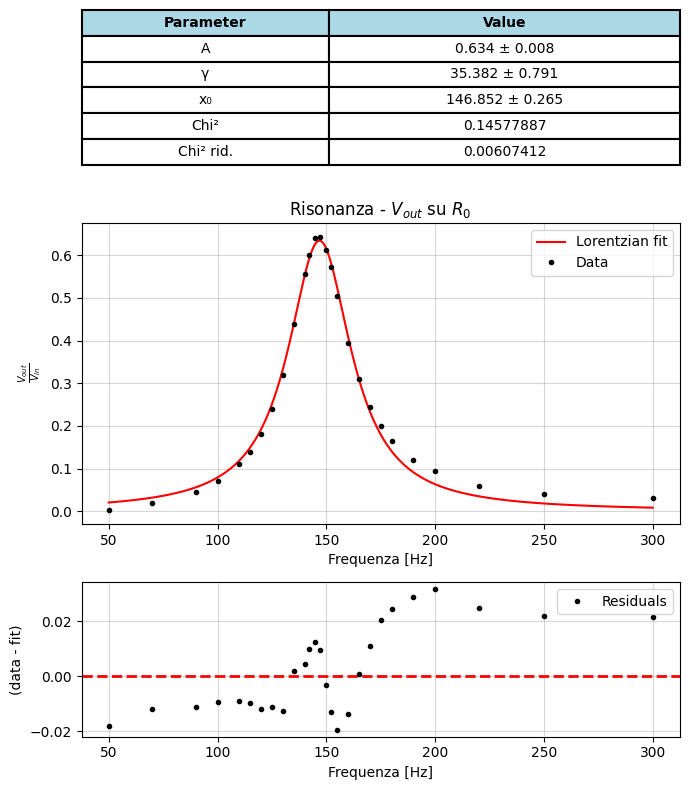

In [24]:
# misura del 5 maggio 2025 togliendo R e usando solo R del generatore
frq2, input2, output2 = np.loadtxt("5maggioRLC.txt", unpack=True, skiprows=1)

out_in = output2/input2

risonanza = bf.lorentzian(frq2, out_in, xlabel='Frequenza [Hz]', ylabel=r'$\frac{V_{out}}{V_{in}}$', titolo=r'Risonanza - $V_{out}$ su $R_0$', plot=True, save=True)
# risonanza5_maggio = bf.bode(frq2, input2, output2, tipo="band", xlabel='Frequenza [Hz]', ylabel=r'$\frac{V_{out}}{V_{in}}$', titolo=r'Risonanza - $V_{out}$ su $R_0$', plot=True, save=True)